# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [11]:
from sklearn.metrics.pairwise import pairwise_distances
pair = pairwise_distances(raitings, metric='cosine')
pair

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [79]:
# a)
print(f' X  Y')
for i, n in zip(pair, range(1, 11)):
    x = []
    j =  np.where(i ==np.min(i[np.nonzero(i)]))
    x = (j[0][0] + 1, n)
    print(x)

 X  Y
(9, 1)
(5, 2)
(10, 3)
(10, 4)
(9, 5)
(10, 6)
(4, 7)
(6, 8)
(1, 9)
(3, 10)


In [81]:
# b)
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA(n_components=5)
pair_reduced = pca.fit_transform(pair)
pair_reduced

array([[-0.15392068,  0.03897685, -0.08412861, -0.05207884, -0.08818108],
       [ 0.03883219,  0.0418255 , -0.01048045,  0.14348454, -0.01438538],
       [-0.16062829, -0.15259595, -0.01146961,  0.04631443, -0.02340529],
       [ 0.1158939 , -0.19114729, -0.08954391,  0.01776404, -0.00363253],
       [-0.05236748,  0.20295497,  0.04563484,  0.05413314, -0.01417763],
       [ 0.0587626 , -0.05981753,  0.20287379,  0.00743222,  0.0080498 ],
       [ 0.26142909,  0.07974579, -0.09413029, -0.01278922,  0.03480892],
       [ 0.11768368, -0.00034412,  0.06809684, -0.11071244, -0.0663643 ],
       [-0.11336395,  0.10488416, -0.03824175, -0.05373503,  0.06565719],
       [-0.11232106, -0.06448239,  0.01138915, -0.03981283,  0.10163031]])

In [83]:
from sklearn.decomposition import TruncatedSVD
trun = decomposition.TruncatedSVD(n_components=5)
pair_reduced = trun.fit_transform(pair)
pair_reduced

array([[ 5.38511506e-01, -1.65207157e-01,  3.86302260e-02,
        -8.51519046e-02, -5.71838450e-02],
       [ 4.89456941e-01,  4.23082376e-02,  4.19458388e-02,
        -9.94507076e-03,  1.47210280e-01],
       [ 5.58311131e-01, -1.76432164e-01, -1.53014483e-01,
        -1.28918267e-02,  4.05256373e-02],
       [ 5.51177260e-01,  1.08687344e-01, -1.91045725e-01,
        -8.94590525e-02,  1.80799830e-02],
       [ 5.54600226e-01, -6.51682818e-02,  2.02740637e-01,
         4.48471965e-02,  5.12192525e-02],
       [ 5.79141545e-01,  4.35136723e-02, -5.99032048e-02,
         2.02305483e-01,  5.21551531e-03],
       [ 6.18903584e-01,  2.42616856e-01,  7.99236557e-02,
        -9.43372548e-02, -1.46474339e-02],
       [ 5.28500083e-01,  1.14899474e-01, -1.83611948e-04,
         6.85937092e-02, -1.09722328e-01],
       [ 4.74006447e-01, -1.09176027e-01,  1.04794960e-01,
        -3.79241345e-02, -5.10959268e-02],
       [ 4.25109649e-01, -9.72289671e-02, -6.44370413e-02,
         1.24739652e-02

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from sympy import *

In [86]:
x = symbols('x')
exp = (tan(sin(x)))**2 + cos(2*x + 3)

In [87]:
print("До диффиренцирования: {}".format(exp))

До диффиренцирования: cos(2*x + 3) + tan(sin(x))**2


In [88]:
dif1 = diff(exp, x)
print("Первая производная : {}".format(dif1))
print(dif1.subs(x, 1).evalf())

Первая производная : 2*(tan(sin(x))**2 + 1)*cos(x)*tan(sin(x)) - 2*sin(2*x + 3)
4.64084346529635


4.64084346529781

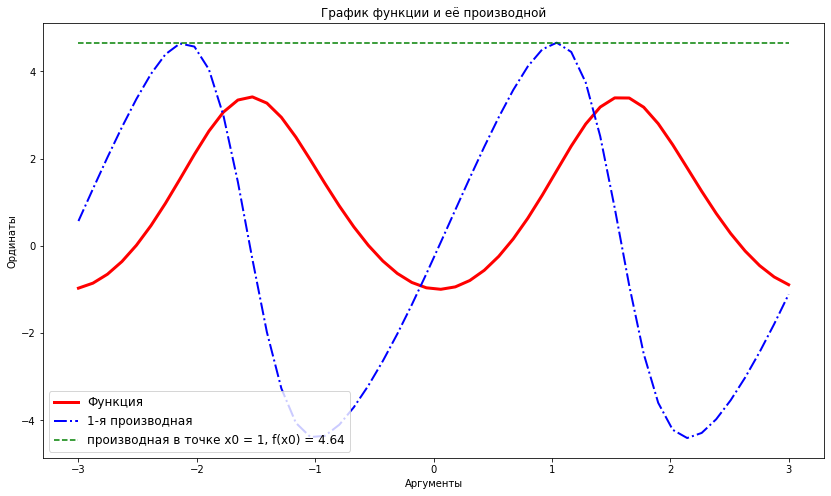

In [164]:
a = np.linspace(-3, 3) 
# from scipy.signal import find_peaks
def f(x):
    return (tan(sin(x)))**2 + cos(2*x + 3)

df = [f(x) for x in a]
df1 = [derivative(f, x, dx=1e-6, n = 1) for x in a]
x0 = 1
df1_ = derivative(f, x0, dx=1e-6, n = 1)
dx = [df1_ + x*0 for x in a]
fig, axes = plt.subplots(figsize = (14, 8))
plt.title('График функции и её производной')
axes.set_xlabel('Аргументы')
axes.set_ylabel('Ординаты')
axes.plot(a, df, 'r', lw = 3, label = 'Функция')
axes.plot(a, df1, 'b-.', lw = 2, label = '1-я производная')
axes.plot(a, dx, 'g--', label = f'производная в точке x0 = 1, f(x0) = {df1_:.2f}')
axes.legend(fontsize=12)
plt.show
df1_

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [165]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [166]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [167]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

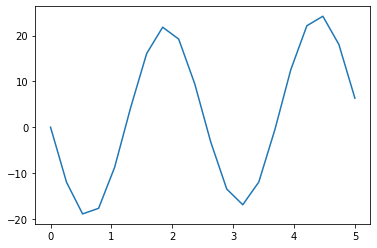

In [168]:
plt.plot(x, fx)
plt.show()

In [169]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [219]:
from scipy.optimize import minimize

a_ = np.arange(-10, 10, 0.1)
b_ = np.arange(-10, 10, 0.1)
d = []
for a, b in zip(a_, b_):
    res = minimize(f, x, args = (a, b), method = 'COBYLA', constraints=(), tol=None, callback=None, options={'rhobeg': 1.0, 'maxiter': 1000, 'disp': False, 'catol': 0.0002})
    c = res.x
    d.append((np.sum(np.abs(fx - f(c, a, b))), a, b))
min_ = min(d)
print(min_[0], 'a =', min_[1], 'b=', min_[2])

237.70829388724917 a = 1.6999999999999584 b= 1.6999999999999584


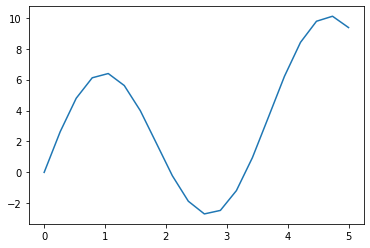

In [220]:
plt.plot(x, f(x, min_[1], min_[2]))
plt.show()


## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [222]:
d = np.random.randint(20, high=None, size=20, dtype='l')
d

array([ 0, 18,  1, 16, 15, 12, 18, 19, 16, 15,  4,  1, 14, 11, 17,  3, 13,
       15,  3, 12])

In [225]:
def f():
    return np.mean(np.random.choice(d, size=50, replace=True, p=None))


11.56

<function matplotlib.pyplot.show(close=None, block=None)>

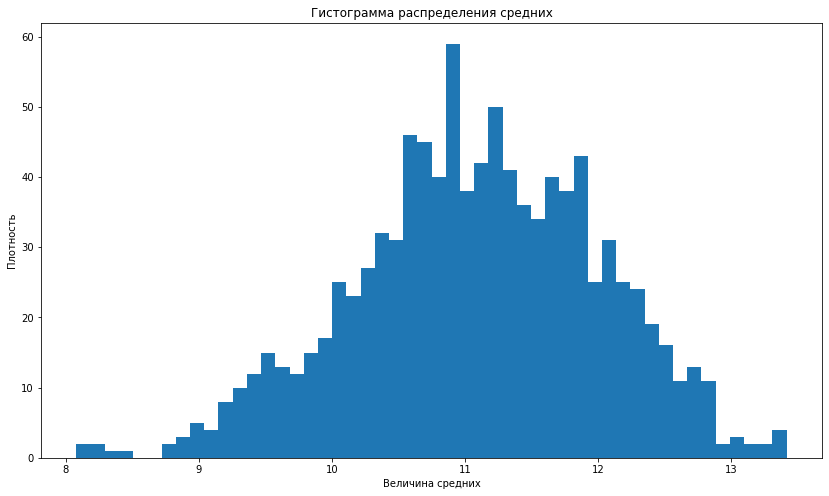

In [233]:
fig, axes = plt.subplots(figsize = (14, 8))
plt.title('Гистограмма распределения средних')
axes.set_xlabel('Величина средних')
axes.set_ylabel('Плотность')
axes.hist([f() for n in range(1000)], bins = 50)
plt.show

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [244]:
from numpy import linalg as la
m = np.array([[1, 4], [1, 1]])
print(m)
# Найдём собственные значения и вектора 
w, v = la.eig(m)
print('Собственные значения') 
print(w, end = '\n \n')
print("Собственные вектора")
print(v)


[[1 4]
 [1 1]]
Собственные значения
[ 3. -1.]
 
Собственные вектора
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


In [240]:
# (1-lam)*(1-lam) - 4 = (1-lam)**2 - 4 = 1 - 2*lam + lam**2 - 4 = lam**2 -2*lam -3
a = 1
b = -2
c = -3
D = b**2 - 4*a*c
lam1 = (-b + D**0.5)/(2*a)
lam2 = (-b - D**0.5)/(2*a)
lam1, lam2

(3.0, -1.0)

In [251]:
m1 = np.array([[-2, 4], [1, -2]])
m2 = np.array([[2, 4], [1, 2]])
v1 = np.array([(2/(5)**0.5), (-2/(5)**0.5)])
v2 = np.array([(1/(5)**0.5), (1/(5)**0.5)])
v1, v2

(array([ 0.89442719, -0.89442719]), array([0.4472136, 0.4472136]))